# Объединение данных

Импорт библиотек

In [1]:
import polars as pl

## Метод pl.DataFrame.join()

На практике нужные данные редко содержатся в одном источнике (в одном *DataFrame*). Чаще приходиться собирать информацию из различных источников и компоновать её вместе. Для этого необходимо объединять данные в один *DataFrame*, и поможет нам в этом метод `pl.DataFrame.join()`.

Параметра метода `join()` следующие:
- `other` - второй DataFrame (таблица, с которой происходит объединение);
- `on` - имя столбца, по которому необходимо произвести объединение (имя столбца в каждом DataFrame должны совпадать при использовании данного столбца);
- `left_on` - имя столбца левой таблицы (используем, когда наименование столбцов разные, метод `on` не используем);
- `right_on` - имя столбца правой таблицы (используем, когда наименование столбцов разные, метод `on` не используем);
- `how` - стратегия объединения. Определяет, какие строки будут включены в результат:
  - `'inner'` - только строки с совпадающими значениями в обоих таблицах (по умолчанию),
  - `'left'` - все строки из левой таблицы + совпадающие из правой (в правой — null, если нет совпадения),
  - `'right'` - все строки из правой таблицы + совпадающие из левой,
  - `'full'` - все строки из обеих таблиц (несовпадающие — заполняются null),
  - `'semi'` - возвращает строки из левой таблицы, для которых есть совпадение в правой,
  - `'anti'` - возвращает строки из левой таблицы, для которых нет совпадения в правой,
  - `'cross'` - возвращает декартово произведение: каждая строка из левой таблицы соединяется с каждой из правой (при установлении данной стратегии, параметры `on`, `left_on`, `right_on` не используются;
- `suffix` - суффикс для дублирующих столбцов (по умолчанию '_right'). Если в обеих таблицах есть столбец с одинаковым именем (кроме ключа объединения), он будет переименован;
- `validate` - проверка типа соединения. Позволяет убедиться, что ключи объединения соответствуют ожидаемой уникальности:
  - `'m:m'` - многие ко многим (по умолчанию). При нём проверка не осуществляется,
  - `'1:1'` - один к одному. Ключи уникальны в обеих таблицах,
  - `'1:m'` - один к многим. Ключи уникальны в левой таблице,
  - `'m:1'` - многие к одному. Ключи уникальны в правой таблице;
- `nulls_equal` - обработка null в ключах (по умолчанию False). Если True, строки с null в ключах могут считаться совпадающими;
- `coalesce` - eправляет тем, будут ли столбцы-ключи объединены в один (если они одинаковы):
  - `None` - объединить, кроме случая `how='full'` (по умолчанию),
  - `True` - всегда объединять столбцы-ключи,
  - `False` - никогда не объединять;
- `maintain_order` - позволяет контролировать порядок строк в результате:
  - `'none'` - порядок не гарантируется (по умолчанию),
  - `'left'` - сохраняется порядок левой таблицы,
  - `'right'` - сохраняется порядок правой таблицы,
  - `'left_right'` - сначала левая, потом правая,
  - `'right_left'` - сначала правая, потом левая.


На рисунке схематично показаны данные варианты объединения датафреймов: 

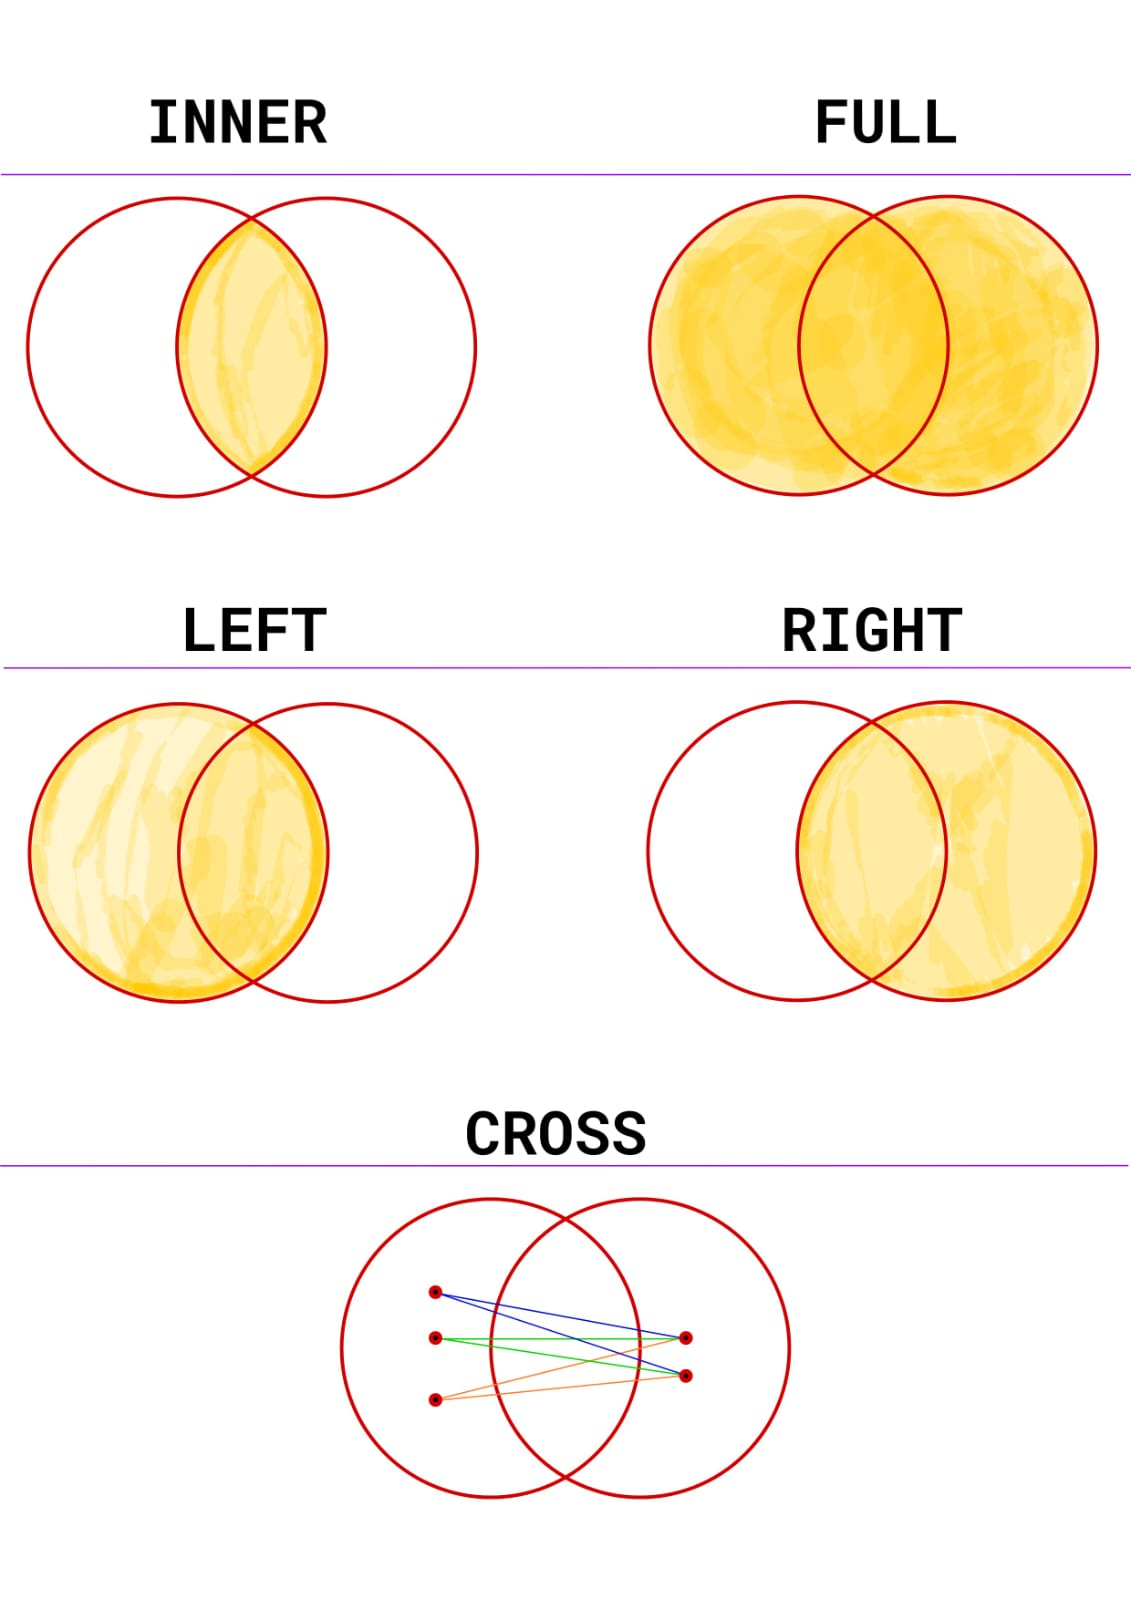

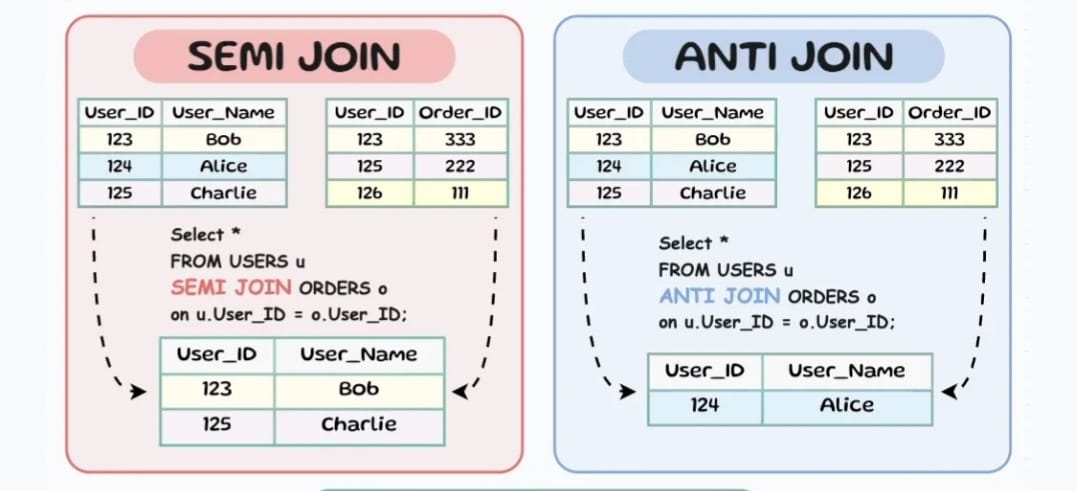

Работать будем со следующими *DataFrames*:

In [2]:
# Датафрейм 1: Информация о городах и уровне загрязнения воздуха
df_cities = pl.DataFrame({
    "city_id": [1, 2, 3, 4, 5],
    "city_name": ["Moscow", "Berlin", "Paris", "New York", "Tokyo"],
    "country": ["Russia", "Germany", "France", "USA", "Japan"],
    "air_quality_index": [85, 35, 45, 90, 70],  # AQI: чем выше — тем хуже
    "green_space_percent": [18.5, 32.0, 25.4, 15.0, 20.3]  # % зелёных зон
})

# Датафрейм 2: Промышленные предприятия и их годовые выбросы CO2 (в тоннах)
df_factories = pl.DataFrame({
    "factory_id": [101, 102, 103, 104, 105],
    "city_id": [1, 2, 3, 4, 6],  # city_id=6 — город не в df_cities
    "factory_name": ["MosEnergo", "GreenChem Berlin", "ParisPower", "NY Waste Inc", "Tokyo Steel"],
    "co2_emissions_tons": [12000, 4500, 3200, 18000, 9500],
    "renewable_energy_used": [False, True, True, False, False]
})

print(df_cities)

print(df_factories)

shape: (5, 5)
┌─────────┬───────────┬─────────┬───────────────────┬─────────────────────┐
│ city_id ┆ city_name ┆ country ┆ air_quality_index ┆ green_space_percent │
│ ---     ┆ ---       ┆ ---     ┆ ---               ┆ ---                 │
│ i64     ┆ str       ┆ str     ┆ i64               ┆ f64                 │
╞═════════╪═══════════╪═════════╪═══════════════════╪═════════════════════╡
│ 1       ┆ Moscow    ┆ Russia  ┆ 85                ┆ 18.5                │
│ 2       ┆ Berlin    ┆ Germany ┆ 35                ┆ 32.0                │
│ 3       ┆ Paris     ┆ France  ┆ 45                ┆ 25.4                │
│ 4       ┆ New York  ┆ USA     ┆ 90                ┆ 15.0                │
│ 5       ┆ Tokyo     ┆ Japan   ┆ 70                ┆ 20.3                │
└─────────┴───────────┴─────────┴───────────────────┴─────────────────────┘
shape: (5, 5)
┌────────────┬─────────┬──────────────────┬────────────────────┬───────────────────────┐
│ factory_id ┆ city_id ┆ factory_name     ┆ co2

### INNER JOIN

При стратегии `inner` мы имеем только те строки, которые имеют совпадающие значения ключа (например, city_id) в обоих датафреймах. Все строки, для которых нет соответствия в одной из таблиц, исключаются из результата. Это означает, что итоговый датафрейм содержит только общие записи, присутствующие и в левой, и в правой таблице. 

In [3]:
df_inner = df_cities.join(df_factories, on="city_id", how="inner")

df_inner

city_id,city_name,country,air_quality_index,green_space_percent,factory_id,factory_name,co2_emissions_tons,renewable_energy_used
i64,str,str,i64,f64,i64,str,i64,bool
1,"""Moscow""","""Russia""",85,18.5,101,"""MosEnergo""",12000,false
2,"""Berlin""","""Germany""",35,32.0,102,"""GreenChem Berlin""",4500,true
3,"""Paris""","""France""",45,25.4,103,"""ParisPower""",3200,true
4,"""New York""","""USA""",90,15.0,104,"""NY Waste Inc""",18000,false


### LEFT JOIN и RIGHT JOIN

При стратегии `left` мы имеем все строки из левого датафрейма (того, который указан первым), а к ним добавляются данные из правого датафрейма там, где значения ключа (например, city_id) совпадают. Если для строки из левого датафрейма нет соответствующей записи в правом, то столбцы из правого датафрейма будут заполнены значениями null. Это означает, что результат включает все записи из левой таблицы, независимо от того, есть ли у них соответствия справа.

In [4]:
df_left = df_cities.join(df_factories, on="city_id", how="left")

df_left

city_id,city_name,country,air_quality_index,green_space_percent,factory_id,factory_name,co2_emissions_tons,renewable_energy_used
i64,str,str,i64,f64,i64,str,i64,bool
1,"""Moscow""","""Russia""",85,18.5,101,"""MosEnergo""",12000,false
2,"""Berlin""","""Germany""",35,32.0,102,"""GreenChem Berlin""",4500,true
3,"""Paris""","""France""",45,25.4,103,"""ParisPower""",3200,true
4,"""New York""","""USA""",90,15.0,104,"""NY Waste Inc""",18000,false
5,"""Tokyo""","""Japan""",70,20.3,null,null,null,null


При стратегии `right` мы имеем все строки из правого датафрейма, а к ним добавляются данные из левого датафрейма там, где значения ключа совпадают. Если для строки из правого датафрейма нет соответствия в левом, то столбцы из левого датафрейма будут заполнены null. Таким образом, результат содержит все записи из правой таблицы, даже если им не нашлось соответствия слева.

In [5]:
df_right = df_cities.join(df_factories, on="city_id", how="right")

df_right

city_name,country,air_quality_index,green_space_percent,factory_id,city_id,factory_name,co2_emissions_tons,renewable_energy_used
str,str,i64,f64,i64,i64,str,i64,bool
"""Moscow""","""Russia""",85,18.5,101,1,"""MosEnergo""",12000,false
"""Berlin""","""Germany""",35,32.0,102,2,"""GreenChem Berlin""",4500,true
"""Paris""","""France""",45,25.4,103,3,"""ParisPower""",3200,true
"""New York""","""USA""",90,15.0,104,4,"""NY Waste Inc""",18000,false
null,null,null,null,105,6,"""Tokyo Steel""",9500,false


### FULL JOIN

При стратегии `full` мы имеем все строки из обоих датафреймов — как из левого, так и из правого. Результат объединяет все доступные записи по ключу, независимо от того, есть ли совпадение в другой таблице. Если для строки из одной таблицы нет соответствия в другой, то отсутствующие столбцы заполняются значениями null. Это означает, что итоговый датафрейм содержит полный охват данных.

In [6]:
df_full = df_cities.join(df_factories, on="city_id", how="full")

df_full

city_id,city_name,country,air_quality_index,green_space_percent,factory_id,city_id_right,factory_name,co2_emissions_tons,renewable_energy_used
i64,str,str,i64,f64,i64,i64,str,i64,bool
1,"""Moscow""","""Russia""",85,18.5,101,1,"""MosEnergo""",12000,false
2,"""Berlin""","""Germany""",35,32.0,102,2,"""GreenChem Berlin""",4500,true
3,"""Paris""","""France""",45,25.4,103,3,"""ParisPower""",3200,true
4,"""New York""","""USA""",90,15.0,104,4,"""NY Waste Inc""",18000,false
null,null,null,null,null,105,6,"""Tokyo Steel""",9500,false
5,"""Tokyo""","""Japan""",70,20.3,null,null,null,null,null


### CROSS JOIN

При стратегии `cross` мы имеем декартово произведение всех строк из левого и правого датафреймов: каждая строка из первого датафрейма комбинируется со всеми строками из второго. В результате получается таблица, где количество строк равно произведению количества строк в обеих таблицах. Совпадение ключей не требуется — объединение происходит «каждый с каждым».

In [7]:
df_cross = df_cities.join(df_factories, how="cross")

df_cross

city_id,city_name,country,air_quality_index,green_space_percent,factory_id,city_id_right,factory_name,co2_emissions_tons,renewable_energy_used
i64,str,str,i64,f64,i64,i64,str,i64,bool
1,"""Moscow""","""Russia""",85,18.5,101,1,"""MosEnergo""",12000,false
1,"""Moscow""","""Russia""",85,18.5,102,2,"""GreenChem Berlin""",4500,true
1,"""Moscow""","""Russia""",85,18.5,103,3,"""ParisPower""",3200,true
1,"""Moscow""","""Russia""",85,18.5,104,4,"""NY Waste Inc""",18000,false
1,"""Moscow""","""Russia""",85,18.5,105,6,"""Tokyo Steel""",9500,false
…,…,…,…,…,…,…,…,…,…
5,"""Tokyo""","""Japan""",70,20.3,101,1,"""MosEnergo""",12000,false
5,"""Tokyo""","""Japan""",70,20.3,102,2,"""GreenChem Berlin""",4500,true
5,"""Tokyo""","""Japan""",70,20.3,103,3,"""ParisPower""",3200,true


### SEMI JOIN

При стратегии `semi` мы имеем только те строки из левого датафрейма, для которых существует хотя бы одно совпадение по ключу в правом датафрейме. При этом в результат включаются только столбцы из левого датафрейма — данные из правого используются только для фильтрации, но не добавляются в итог.

In [8]:
df_semi = df_cities.join(df_factories, on="city_id", how="semi")

df_semi

city_id,city_name,country,air_quality_index,green_space_percent
i64,str,str,i64,f64
1,"""Moscow""","""Russia""",85,18.5
2,"""Berlin""","""Germany""",35,32.0
3,"""Paris""","""France""",45,25.4
4,"""New York""","""USA""",90,15.0


### ANTI JOIN

При стратегии `anti` мы имеем только те строки из левого датафрейма, для которых **нет** совпадений по ключу в правом датафрейме. То есть результат включает объекты из левой таблицы, которые не связаны ни с одной строкой в правой. Как и в `semi`, в результирующий датафрейм попадают только столбцы из левого датафрейма.

In [9]:
df_anti = df_cities.join(df_factories, on="city_id", how="anti")

df_anti

city_id,city_name,country,air_quality_index,green_space_percent
i64,str,str,i64,f64
5,"""Tokyo""","""Japan""",70,20.3


## Метод pl.DataFrame.join_asof()

Метод `join_asof()` выполняет поиск "ближайшего" совпадения по упорядоченному ключу (обычно временному), а не точного равенства. Это похоже на left join, но вместо строгого равенства ключей используется поиск по ближайшему значению, которое меньше или равно, больше или равно, либо наиболее близкое.

Это особенно полезно, когда данные имеют разные временные метки, и хотим "подтянуть" актуальную информацию с небольшим смещением — например, привязать показания датчика к ближайшему измерению качества воздуха. 

Допустим, есть данные о погоде по городам с поминутной разбивкой. И есть измерения уровня CO₂, которые делаются нерегулярно (например, раз в 10–15 минут). Необходимо для каждого измерения погоды подтянуть последнее доступное значение CO₂ до этого момента.

In [10]:
# Погода (часто)
df_weather = pl.DataFrame({
    "time": [
        "2023-01-01 10:00:00",
        "2023-01-01 10:01:00",
        "2023-01-01 10:05:00",
        "2023-01-01 10:03:00",
        "2023-01-01 10:05:00"
    ],
    "city": ["Moscow", "Moscow", "Moscow", "Berlin", "Berlin"],
    "temperature": [-5.0, -4.8, -4.5, 2.1, 2.3]
}).with_columns(pl.col("time").str.strptime(pl.Datetime))

# Уровень CO₂ (редко)
df_co2 = pl.DataFrame({
    "time": [
        "2023-01-01 09:58:00",
        "2023-01-01 10:02:30",
        "2023-01-01 10:04:15"
    ],
    "city": ["Moscow", "Moscow", "Berlin"],
    "co2_level": [420.1, 435.0, 410.2]
}).with_columns(pl.col("time").str.strptime(pl.Datetime))

print(df_weather)

print(df_co2)

shape: (5, 3)
┌─────────────────────┬────────┬─────────────┐
│ time                ┆ city   ┆ temperature │
│ ---                 ┆ ---    ┆ ---         │
│ datetime[μs]        ┆ str    ┆ f64         │
╞═════════════════════╪════════╪═════════════╡
│ 2023-01-01 10:00:00 ┆ Moscow ┆ -5.0        │
│ 2023-01-01 10:01:00 ┆ Moscow ┆ -4.8        │
│ 2023-01-01 10:05:00 ┆ Moscow ┆ -4.5        │
│ 2023-01-01 10:03:00 ┆ Berlin ┆ 2.1         │
│ 2023-01-01 10:05:00 ┆ Berlin ┆ 2.3         │
└─────────────────────┴────────┴─────────────┘
shape: (3, 3)
┌─────────────────────┬────────┬───────────┐
│ time                ┆ city   ┆ co2_level │
│ ---                 ┆ ---    ┆ ---       │
│ datetime[μs]        ┆ str    ┆ f64       │
╞═════════════════════╪════════╪═══════════╡
│ 2023-01-01 09:58:00 ┆ Moscow ┆ 420.1     │
│ 2023-01-01 10:02:30 ┆ Moscow ┆ 435.0     │
│ 2023-01-01 10:04:15 ┆ Berlin ┆ 410.2     │
└─────────────────────┴────────┴───────────┘


In [11]:
df_asof = df_weather.join_asof(
    df_co2,
    on="time",           # ключ для "нечёткого" совпадения
    by="city",           # сначала группируем по городу
    strategy="backward"  # берём последнее значение ДО текущего времени
)

df_asof

C:\Users\ardat\AppData\Local\Temp\ipykernel_47880\1524103828.py:1: UserWarning: Sortedness of columns cannot be checked when 'by' groups provided
  df_asof = df_weather.join_asof(


time,city,temperature,co2_level
datetime[μs],str,f64,f64
2023-01-01 10:00:00,"""Moscow""",-5.0,420.1
2023-01-01 10:01:00,"""Moscow""",-4.8,420.1
2023-01-01 10:05:00,"""Moscow""",-4.5,435.0
2023-01-01 10:03:00,"""Berlin""",2.1,null
2023-01-01 10:05:00,"""Berlin""",2.3,410.2


Результат:
- Для 10:00:00 Moscow — CO₂ = 420.1 (последнее до этого времени)
- Для 10:01:00 Moscow — CO₂ = 420.1
- Для 10:05:00 Moscow — CO₂ = 435.0 (ещё не обновилось)
- Для 10:03:00 Berlin — CO₂ = null (ближайшее значение 10:04:15 после текущего времени)
- Для 10:05:00 Berlin — CO₂ = 410.2 (ближайшее значение 10:04:15)

Ключевые особенности `join_asof()`:
1. Требуется сортировка - оба набора данных должны быть отсортированы по ключу соединения (on) и by (если используется).
2. Поддержка временных типов - удобен для Datetime, Date, Time.
3. Стратегии (`strategy`) поиска:
   - **backward** — последнее значение до или равно,
   - **forward** — первое значение после или равно,
   - **nearest** — ближайшее по значению.
4. `Tolerance` - позволяет задать допуск поиска: например, `tolerance="5m"` — искать только в пределах 5 минут.
5. Группировка (`by`) - позволяет делать *asof-join* внутри групп, например, по городам, станциям и т.д.
6. Не дублирует строки - каждая строка левой таблицы получает одно значение из правой.

Метод `join_asof()` удобно использовать, например, при анализе временных рядов с разной частотой.

## Метод pl.DataFrame.join_where()

Метод `join_where()` выполняет внутренне соединение на основе одного или нескольких условий, которые могут включать неравенства, сравнения, логические операции и даже сложные выражения. Вместо того чтобы соединять таблицы по совпадению ключей (например, user_id = user_id), мы задаём логические предикаты, по которым строки из левой и правой таблиц будут считаться "связанными".

Допустим, у нас есть:
- Данные о дожде в разных регионах: region, rainfall_mm, date
- Данные о растениях: species, min_rainfall_needed, region

In [12]:
rainfall = pl.DataFrame({
    "region": ["North", "South", "East"],
    "rainfall_mm": [80, 120, 60],
    "date": ["2023-05-01", "2023-05-01", "2023-05-01"]
})

plants = pl.DataFrame({
    "species": ["Pine", "Bamboo", "Cactus", "Oak"],
    "min_rainfall_needed": [50, 100, 30, 70],
    "region": ["North", "South", "East", "North"]
})

print(rainfall)

print(plants)

shape: (3, 3)
┌────────┬─────────────┬────────────┐
│ region ┆ rainfall_mm ┆ date       │
│ ---    ┆ ---         ┆ ---        │
│ str    ┆ i64         ┆ str        │
╞════════╪═════════════╪════════════╡
│ North  ┆ 80          ┆ 2023-05-01 │
│ South  ┆ 120         ┆ 2023-05-01 │
│ East   ┆ 60          ┆ 2023-05-01 │
└────────┴─────────────┴────────────┘
shape: (4, 3)
┌─────────┬─────────────────────┬────────┐
│ species ┆ min_rainfall_needed ┆ region │
│ ---     ┆ ---                 ┆ ---    │
│ str     ┆ i64                 ┆ str    │
╞═════════╪═════════════════════╪════════╡
│ Pine    ┆ 50                  ┆ North  │
│ Bamboo  ┆ 100                 ┆ South  │
│ Cactus  ┆ 30                  ┆ East   │
│ Oak     ┆ 70                  ┆ North  │
└─────────┴─────────────────────┴────────┘


Найдём все комбинации "регион + вид растения", где количество осадков достаточно для выживания вида:

In [13]:
df_rl = rainfall.join_where(
    plants,
    pl.col("rainfall_mm") >= pl.col("min_rainfall_needed"),
    pl.col("region") == pl.col("region")  # можно и без этого, если совпадают
)

df_rl

region,rainfall_mm,date,species,min_rainfall_needed,region_right
str,i64,str,str,i64,str
"""South""",120,"""2023-05-01""","""Bamboo""",100,"""South"""
"""South""",120,"""2023-05-01""","""Oak""",70,"""North"""
"""South""",120,"""2023-05-01""","""Pine""",50,"""North"""
"""South""",120,"""2023-05-01""","""Cactus""",30,"""East"""
"""North""",80,"""2023-05-01""","""Oak""",70,"""North"""
"""North""",80,"""2023-05-01""","""Pine""",50,"""North"""
"""North""",80,"""2023-05-01""","""Cactus""",30,"""East"""
"""East""",60,"""2023-05-01""","""Pine""",50,"""North"""
"""East""",60,"""2023-05-01""","""Cactus""",30,"""East"""


*join_where* похож на *cross join + filter*, но более эффективно реализован и удобен в синтаксисе. 

**Примечание**. Метод `join_where()` - экспериментальный метод. В новых версиях библиотеки может быть изменена.

## Метод pl.DataFrame.vstack()

Метод `vstack()` позволяет добавить строки из одного датафрейма в конец другого — то есть выполнить вертикальное слияние. Он работает только если оба датафрейма имеют одинаковые столбцы (имена и типы).

Допустим, у нас есть данные о замерах качества воздуха по дням, и они хранятся в отдельных датафреймах:

In [14]:
day1 = pl.DataFrame({
    "date": ["2023-06-01", "2023-06-01"],
    "city": ["Moscow", "Berlin"],
    "aqi": [85, 35],  # Air Quality Index
    "pm25": [45.2, 12.1]
})

day2 = pl.DataFrame({
    "date": ["2023-06-02", "2023-06-02", "2023-06-02"],
    "city": ["Moscow", "Paris", "Tokyo"],
    "aqi": [90, 42, 75],
    "pm25": [48.0, 14.3, 30.5]
})

print(day1)

print(day2)

shape: (2, 4)
┌────────────┬────────┬─────┬──────┐
│ date       ┆ city   ┆ aqi ┆ pm25 │
│ ---        ┆ ---    ┆ --- ┆ ---  │
│ str        ┆ str    ┆ i64 ┆ f64  │
╞════════════╪════════╪═════╪══════╡
│ 2023-06-01 ┆ Moscow ┆ 85  ┆ 45.2 │
│ 2023-06-01 ┆ Berlin ┆ 35  ┆ 12.1 │
└────────────┴────────┴─────┴──────┘
shape: (3, 4)
┌────────────┬────────┬─────┬──────┐
│ date       ┆ city   ┆ aqi ┆ pm25 │
│ ---        ┆ ---    ┆ --- ┆ ---  │
│ str        ┆ str    ┆ i64 ┆ f64  │
╞════════════╪════════╪═════╪══════╡
│ 2023-06-02 ┆ Moscow ┆ 90  ┆ 48.0 │
│ 2023-06-02 ┆ Paris  ┆ 42  ┆ 14.3 │
│ 2023-06-02 ┆ Tokyo  ┆ 75  ┆ 30.5 │
└────────────┴────────┴─────┴──────┘


Объединим по строкам:

In [15]:
all_data = day1.vstack(day2)

all_data

date,city,aqi,pm25
str,str,i64,f64
"""2023-06-01""","""Moscow""",85,45.2
"""2023-06-01""","""Berlin""",35,12.1
"""2023-06-02""","""Moscow""",90,48.0
"""2023-06-02""","""Paris""",42,14.3
"""2023-06-02""","""Tokyo""",75,30.5


В результате получаем один *DataFrame* со всеми измерениями за два дня.

Метод `vstack()` — это быстрый способ добавить строки из одного датафрейма в другой, когда структура данных полностью совпадает. Он идеально подходит для накопления однотипных данных — например, ежедневных экологических измерений, логов датчиков, записей о выбросах и т.д.

**Примечание**. Метод внутри себя содержит параметр `in_place`, что позволяет при True изменять *DataFrame* на месте (по умолчанию False).